# Eksperimen Fisika

# KLASIFIKASI PENYAKIT DIABETES DENGAN MENGGUNAKAN ALGORITHMA MACHINE LEARNING

# Identitas Diri

- Nama : Muhammad Rizky Anugrah
- NIM : 1306620089
- Kelas: Fisika B
- Dosen: Haris Suhendar, M.Si

# Source Code

## PROBLEM  STATEMENT

- Tujuan dari dataset diabetes ini adalah untuk memprediksi apakah pasien menderita diabetes atau tidak.

- Kumpulan data terdiri dari beberapa variabel prediktor medis (Independen) dan satu variabel target, (Hasil).

- Variabel prediktor meliputi kehamilan. Glukosa. Tekanan Darah, Ketebalan Kulit, Insulin.BMI. Diabetes Silsilah Fungsi, usia, dan Hasil.

## IMPORT LIBRARY

In [6355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOAD DATA SET

In [6356]:
# Memasukan dataset diabetes ke pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

## EXPLORATORY DATA ANALYSIS

In [6357]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6358]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6359]:
diabetes_dataset.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
368,3,81,86,16,66,27.5,0.306,22,0
729,2,92,52,0,0,30.1,0.141,22,0
178,5,143,78,0,0,45.0,0.190,47,0
513,2,91,62,0,0,27.3,0.525,22,0
618,9,112,82,24,0,28.2,1.282,50,1
244,2,146,76,35,194,38.2,0.329,29,0
635,13,104,72,0,0,31.2,0.465,38,1
303,5,115,98,0,0,52.9,0.209,28,1
644,3,103,72,30,152,27.6,0.730,27,0
191,9,123,70,44,94,33.1,0.374,40,0


In [6360]:
diabetes_dataset.shape

(768, 9)

In [6361]:
# Dapatkan daftar jenis semua kolom di dataset
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6362]:
# Mencari tahu apakah dataset berisi nilai nol
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6363]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6364]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6365]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6366]:
# Mencetak Nilai Zero dari Setiap Kolom

In [6367]:
print('No. of zero values in Glucose ',diabetes_dataset[diabetes_dataset['Glucose']==0].shape[0])

No. of zero values in Glucose  5


In [6368]:
print('No. of zero values in BloodPressure ',diabetes_dataset[diabetes_dataset['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure  35


In [6369]:
print('No. of zero values in SkinThickness ',diabetes_dataset[diabetes_dataset['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness  227


In [6370]:
print('No. of zero values in Insulin ',diabetes_dataset[diabetes_dataset['Insulin']==0].shape[0])

No. of zero values in Insulin  374


In [6371]:
print('No. of zero values in BMI ',diabetes_dataset[diabetes_dataset['BMI']==0].shape[0])

No. of zero values in BMI  11


In [6372]:
# Menggannti Nilai 0 setiap column dengan rata2 setiap column

In [6373]:
diabetes_dataset['Glucose']=diabetes_dataset['Glucose'].replace(0,diabetes_dataset['Glucose'].mean())

In [6374]:
print('No. of zero values in Glucose ',diabetes_dataset[diabetes_dataset['Glucose']==0].shape[0])

No. of zero values in Glucose  0


In [6375]:
diabetes_dataset['BloodPressure']=diabetes_dataset['BloodPressure'].replace(0,diabetes_dataset['BloodPressure'].mean()) 
diabetes_dataset['SkinThickness']=diabetes_dataset['SkinThickness'].replace(0,diabetes_dataset['SkinThickness'].mean()) 
diabetes_dataset['Insulin']=diabetes_dataset['Insulin'].replace(0,diabetes_dataset['Insulin'].mean()) 
diabetes_dataset['BMI']=diabetes_dataset['BMI'].replace(0,diabetes_dataset['BMI'].mean()) 

In [6376]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## DATA VISUALIZATION

Negative (0):  500
Positive (1):  268


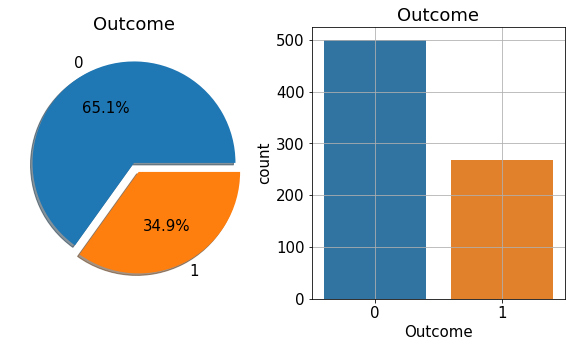

In [6377]:
# outcome count plot
f, ax=plt.subplots(1,2, figsize=(10,5))
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' ,ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
N,P=diabetes_dataset['Outcome'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()

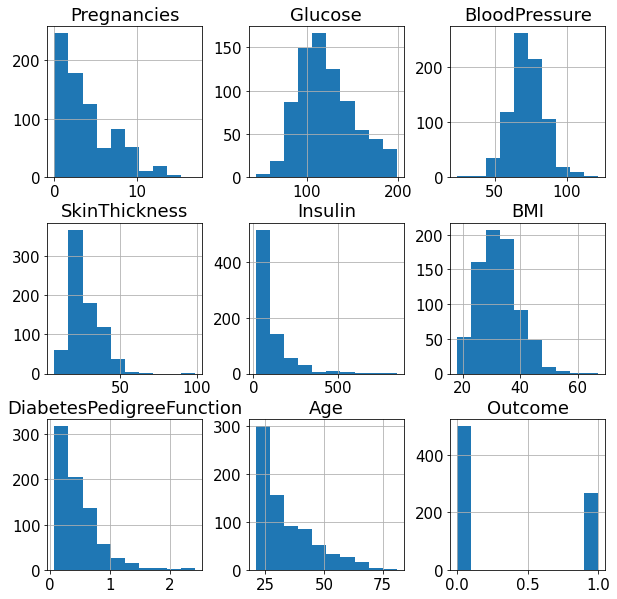

In [6378]:
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

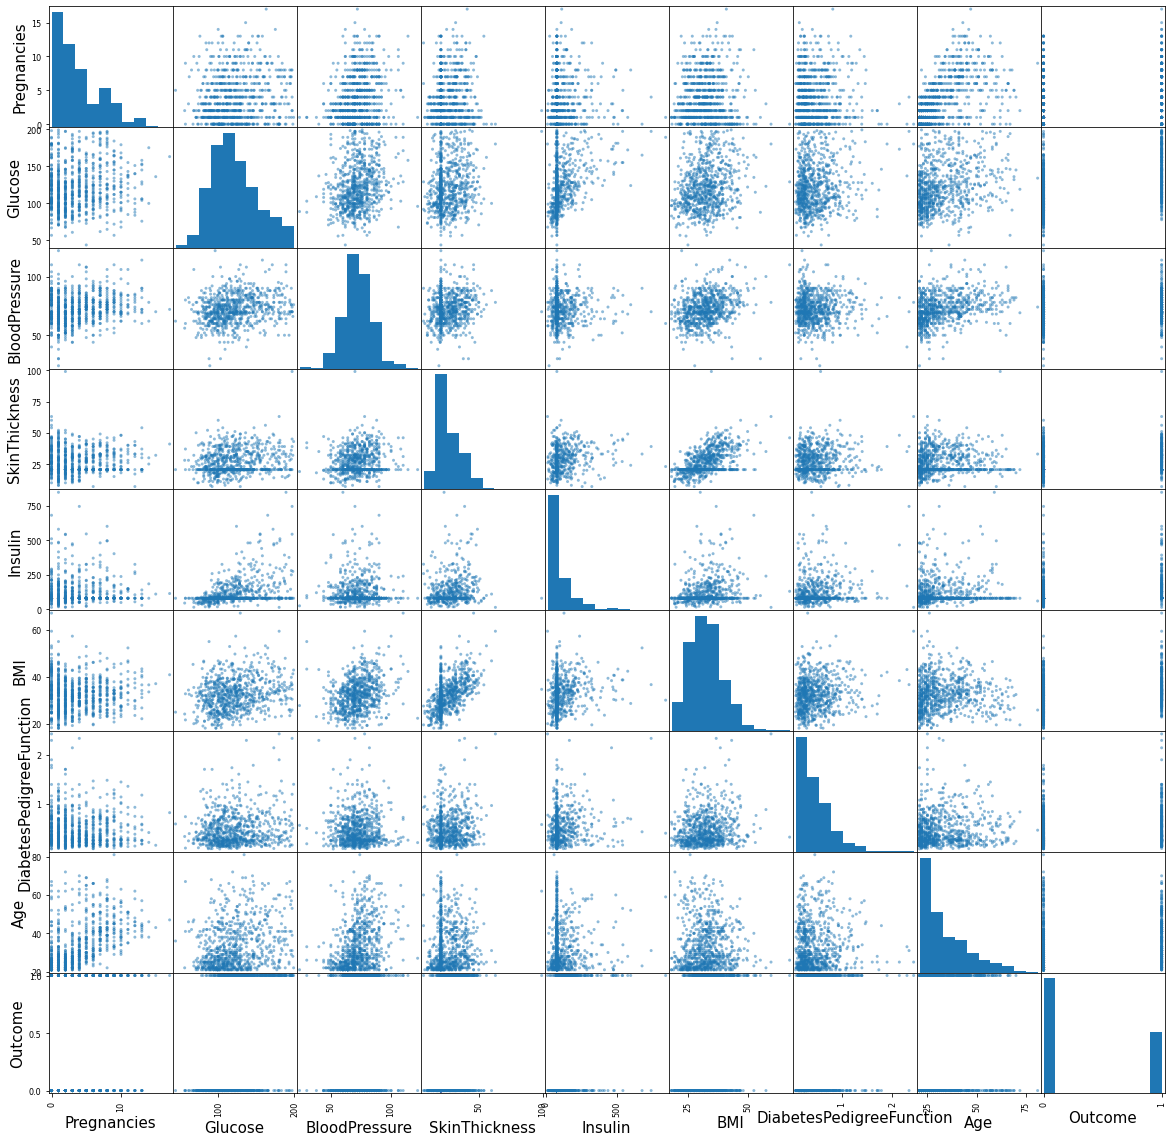

In [6379]:
#Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(diabetes_dataset, figsize = (20, 20));

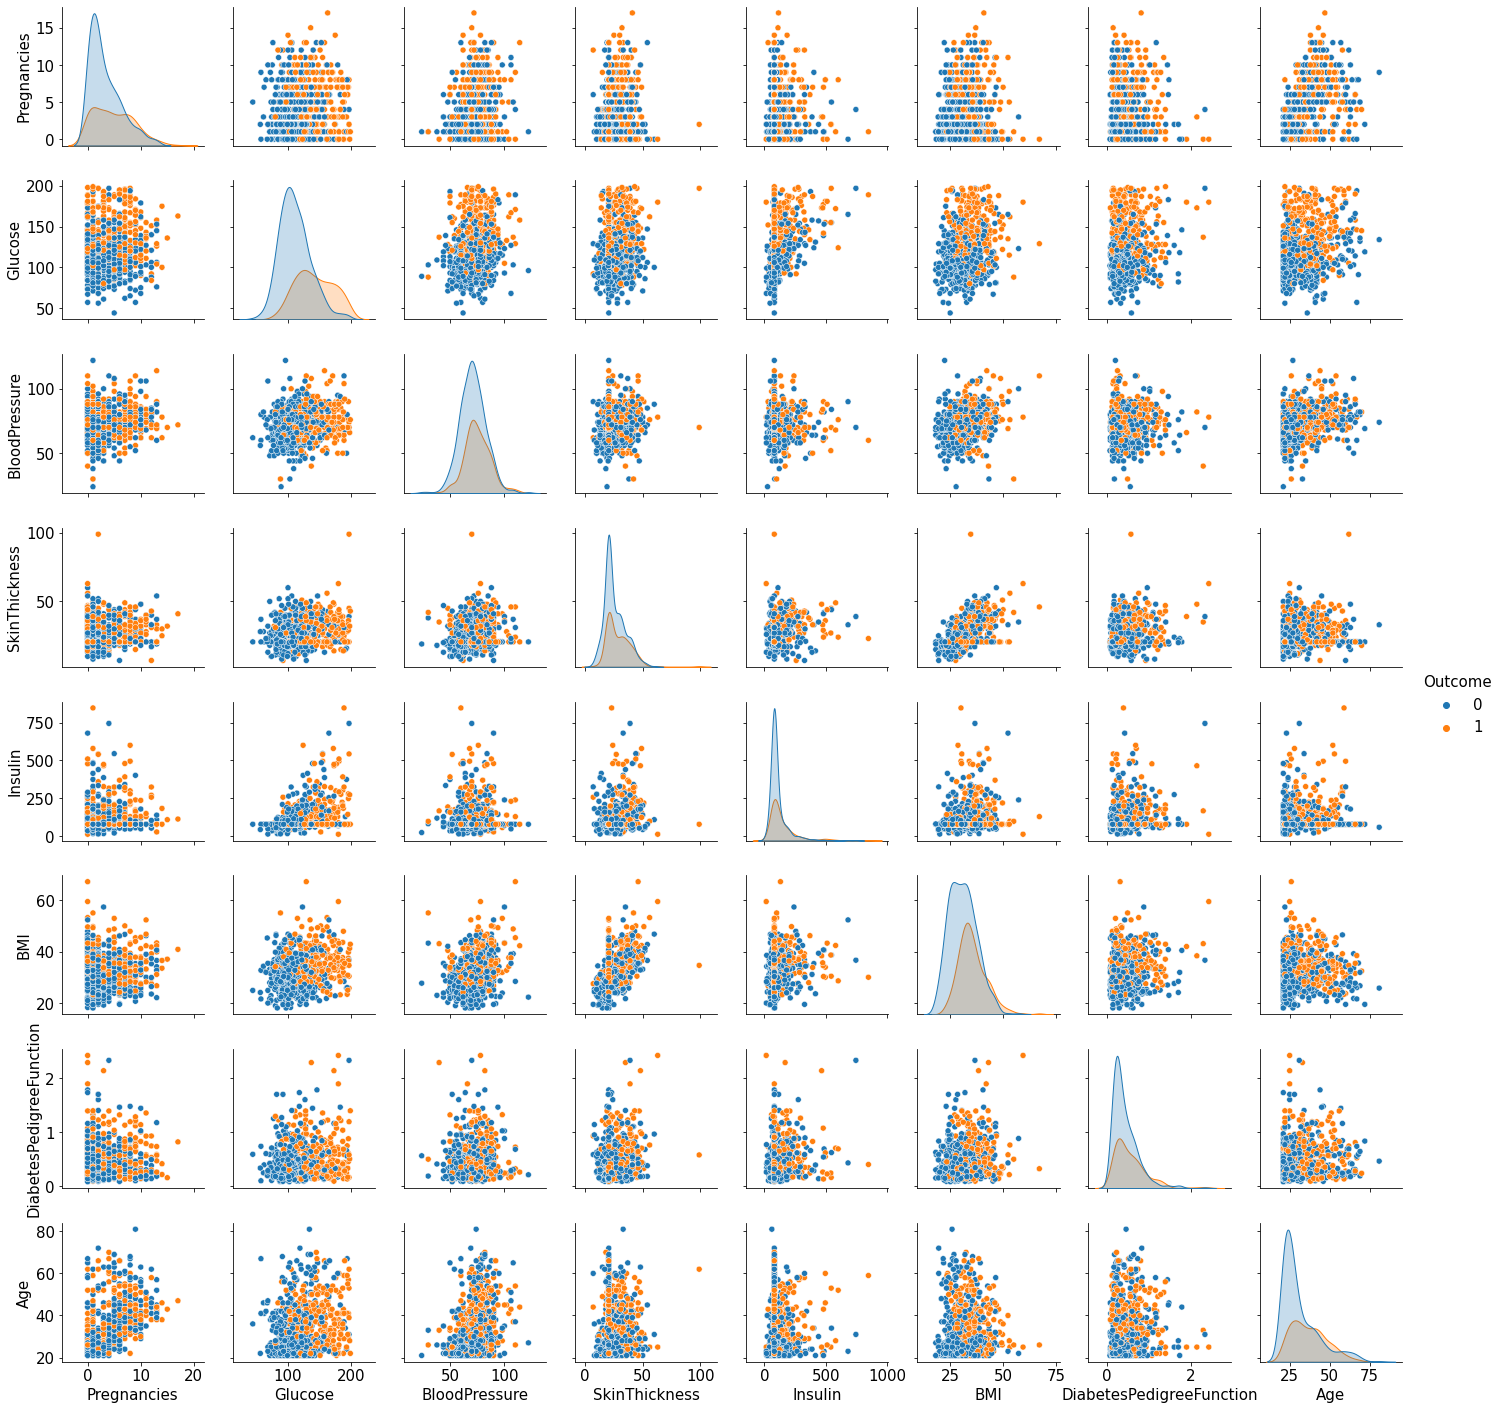

In [6380]:
# Pairplot
sns.pairplot(data = diabetes_dataset, hue = 'Outcome')
plt.show()

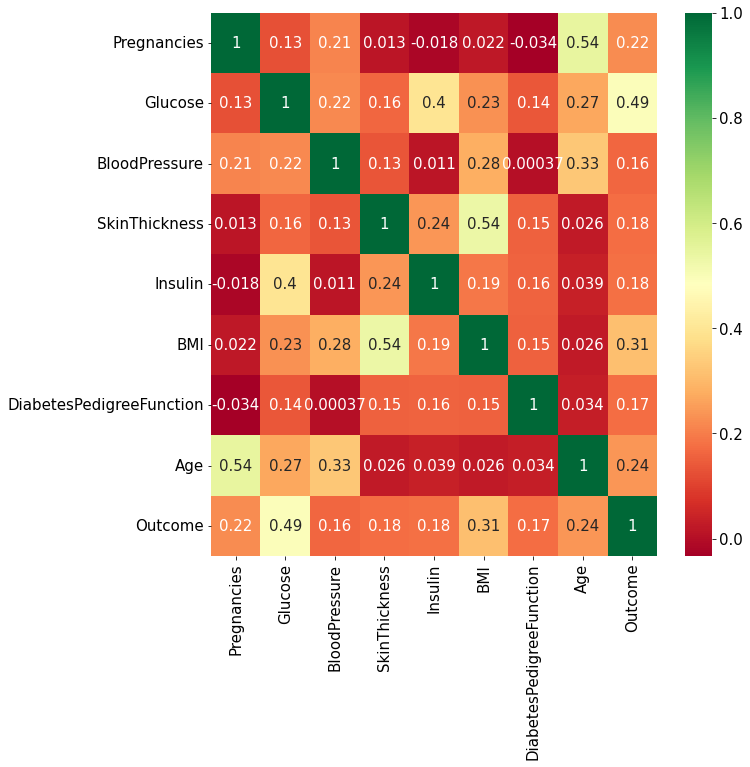

In [6381]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = diabetes_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(diabetes_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## SPLIT DATA FRAME MENJADI X DAN y

In [6382]:
target_name = 'Outcome'
y = diabetes_dataset[target_name]
X = diabetes_dataset.drop(target_name, axis=1)

In [6383]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [6384]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## APPLY FEATURE SCALING

In [6385]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

## TRAIN TEST SPLIT

In [6386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    standardized_data, y, test_size = 0.2, random_state=4)

In [6387]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [6388]:
X_test.shape,y_test.shape

((154, 8), (154,))

## MEMBUAT 5 METODE ALGORITHM

In [6389]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [6390]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [6391]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [6392]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [6393]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

## MEMBUAT PREDIKSI

In [6394]:
X_test.shape

(154, 8)

In [6395]:
mlp_pred = mlp.predict(X_test)

In [6396]:
mlp_pred.shape

(154,)

In [6397]:
nb_pred = nb.predict(X_test)

In [6398]:
nb_pred.shape

(154,)

In [6399]:
sv_pred = sv.predict(X_test)

In [6400]:
sv_pred.shape

(154,)

In [6401]:
dt_pred = dt.predict(X_test)

In [6402]:
dt_pred.shape

(154,)

In [6403]:
rf_pred = rf.predict(X_test)

In [6404]:
rf_pred.shape

(154,)

## MODEL EVALUASI

In [6405]:
from sklearn.metrics import accuracy_score

In [6406]:
#Train score & Test score of Artificial Neural Network (ANN)
print("Train Accuracy of Artificial Neural Network (ANN)", mlp.score(X_train, y_train)*100)
print("Accuracy (Test) score of Artificial Neural Network (ANN)", mlp.score(X_test, y_test)*100)
print("Accuracy score of Artificial Neural Network (ANN)", accuracy_score(y_test, mlp_pred)*100)

Train Accuracy of Artificial Neural Network (ANN) 81.75895765472313
Accuracy (Test) score of Artificial Neural Network (ANN) 75.97402597402598
Accuracy score of Artificial Neural Network (ANN) 75.97402597402598


In [6407]:
#Train score & Test score of Naive-Bayes
print("Train Accuracy of Naive Bayes", nb.score(X_train, y_train)*100)
print("Accuracy (Test) score of Naive Bayes", nb.score(X_test, y_test)*100)
print("Accuracy score of Naive Bayes", accuracy_score(y_test, nb_pred)*100)

Train Accuracy of Naive Bayes 74.5928338762215
Accuracy (Test) score of Naive Bayes 74.67532467532467
Accuracy score of Naive Bayes 74.67532467532467


In [6408]:
# Train score & Test score of SVM
print("Train Accuracy of SVM", sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test, y_test)*100)
print("Accuracy score of SVM", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 82.89902280130293
Accuracy (Test) score of SVM 76.62337662337663
Accuracy score of SVM 76.62337662337663


In [6409]:
# Train score & Test score of Decesion Tree 
print("Train Accuracy of Decesion Tree", dt.score(X_train, y_train)*100)
print("Accuracy (Test) score of Decesion Tree",dt.score(X_test, y_test)*100)
print("Accuracy score of Decesion Tree", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decesion Tree 100.0
Accuracy (Test) score of Decesion Tree 69.48051948051948
Accuracy score of Decesion Tree 69.48051948051948


In [6410]:
# Train score & Test score of Random Forest
print("Train Accuracy of Random Forest", rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print("Accuracy score of Random Forest", accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 75.32467532467533
Accuracy score of Random Forest 75.32467532467533


# Confusion Matrix

Confusion Matrix adalah tabel yang digunakan untuk menggambarkan kinerja masalah klasifikasi.
Ini memvisualisasikan keakuratan classifier dengan membandingkan nilai prediksi dengan nilai sebenarnya.
Istilah yang digunakan dalam Confusion Matrix adalah True positive (TP), true negative (TN). positif palsu (FP) dan negatif palsu (FN)

- True Positive: Hasil yang diprediksi adalah positif, meskipun diberi label positif.

- False Positive: Hasil yang diprediksi adalah positif, meskipun diberi label negatif. Itu juga menyebut Kesalahan Tipe I.

- False Negative: Hasil yang diprediksi adalah negatif, meskipun diberi label positif. Itu juga menyebut Kesalahan Tipe II.

- True Negative: Hasil prediksi negatif, sementara itu diberi label negatif.

In [6411]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of ANN
cm_mlp = confusion_matrix(y_test,mlp_pred)
cm_mlp

array([[82, 20],
       [17, 35]], dtype=int64)

<AxesSubplot:>

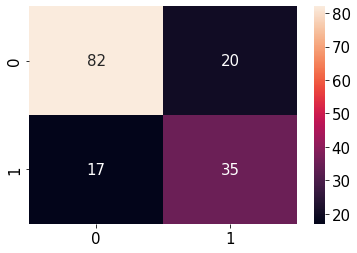

In [6412]:
sns.heatmap(confusion_matrix(y_test,mlp_pred),annot=True,fmt="d")

In [6413]:
TN = cm_mlp[0,0]
FP = cm_mlp[0,1]
FN = cm_mlp[1,0]
TP = cm_mlp[1,1]

In [6414]:
TN, FP, FN, TP

(82, 20, 17, 35)

In [6415]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_mlp = confusion_matrix(y_test, mlp_pred)

print('TN - True Negative {}'.format(cm_mlp[0,0])) 
print('FP - False Positive {}'.format(cm_mlp[0,1]))
print('FN - False Negative {}'.format(cm_mlp[1,0]))
print('TP - True Positive {}'.format(cm_mlp[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_mlp[0,0],cm_mlp[1,1]]),np.sum(cm_mlp))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_mlp[0,1],cm_mlp[1,0]]),np.sum(cm_mlp))*100))

TN - True Negative 82
FP - False Positive 20
FN - False Negative 17
TP - True Positive 35
Accuracy Rate: 75.97402597402598
Misclassification Rate: 24.025974025974026


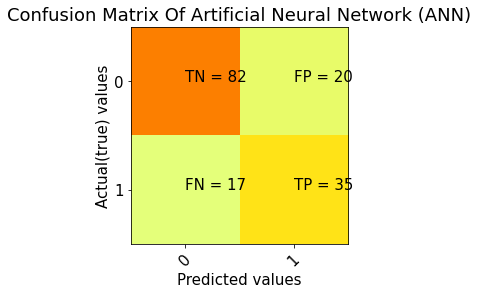

In [6416]:
plt.clf()
plt.imshow(cm_mlp, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Artificial Neural Network (ANN)')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_mlp[i][j]))

In [6417]:
pd.crosstab(y_test, mlp_pred, margins=False)

col_0,0,1
Outcome,,
0,82,20
1,17,35


In [6418]:
pd.crosstab(y_test, mlp_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,82,20,102
1,17,35,52
All,99,55,154


In [6419]:
pd.crosstab(y_test, mlp_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,82,20,102
1,17,35,52
All,99,55,154


In [6420]:
TP,FP

(35, 20)

In [6421]:
Precision = TP/(TP+FP)
Precision

0.6363636363636364

In [6422]:
# print precision score

precision_Score_mlp = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_mlp))

Precision score: 63.6364


In [6423]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, mlp_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, mlp_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (y_test, mlp_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, mlp_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(y_test, mlp_pred, average=None)*100)

precision Score is: 63.63636363636363
Mircro Average precision Score is: 75.97402597402598
Marcro Average precision Score is: 73.23232323232322
Weighted Average precision Score is: 76.34789452971272
precision Score on Non weighted score is: [82.82828283 63.63636364]


In [6424]:
print('Classification Report of Artificial Neural Network (ANN): \n',classification_report(y_test, mlp_pred, digits=4))

Classification Report of Artificial Neural Network (ANN): 
               precision    recall  f1-score   support

           0     0.8283    0.8039    0.8159       102
           1     0.6364    0.6731    0.6542        52

    accuracy                         0.7597       154
   macro avg     0.7323    0.7385    0.7351       154
weighted avg     0.7635    0.7597    0.7613       154



In [6425]:
recall_score_mlp = TP / float(TP + FN)*100
print('recall score', recall_score_mlp)

recall score 67.3076923076923


In [6426]:
TP,FN

(35, 17)

In [6427]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(y_test,mlp_pred)*100)

Recall or Sensitivity score : 67.3076923076923


In [6428]:
print("Mircro Average Recall Score is", recall_score(y_test, mlp_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(y_test, mlp_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test, mlp_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(y_test, mlp_pred, average=None)*100)

Mircro Average Recall Score is 75.97402597402598
Marcro Average Recall Score is 73.8499245852187
Weighted Average Recall Score is: 75.97402597402598
Recall Score on Non weighted score is: [80.39215686 67.30769231]


In [6429]:
print('Classification Report of Artificial Neural Network (ANN): \n',classification_report(y_test,mlp_pred,digits=4))

Classification Report of Artificial Neural Network (ANN): 
               precision    recall  f1-score   support

           0     0.8283    0.8039    0.8159       102
           1     0.6364    0.6731    0.6542        52

    accuracy                         0.7597       154
   macro avg     0.7323    0.7385    0.7351       154
weighted avg     0.7635    0.7597    0.7613       154



In [6430]:
FPR_mlp = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_mlp))

False Positive Rate: 19.6078


In [6431]:
FP, TN

(20, 82)

In [6432]:
specificity_mlp = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_mlp))

Specificity: 80.3922


In [6433]:
from sklearn.metrics import f1_score
f1_score_mlp = f1_score(y_test, mlp_pred)*100
print("f1_score of macro :",f1_score_mlp)

f1_score of macro : 65.42056074766354


In [6434]:
print("Mircro Average F1 Score is:", f1_score(y_test, mlp_pred, average='micro')*100)
print("Marcro Average F1 Score is:", f1_score(y_test, mlp_pred, average='macro')*100)
print("Weighted Average F1 Score is:", f1_score(y_test, mlp_pred, average='weighted')*100)
print("F1 Score on Non weighted score is:", f1_score(y_test, mlp_pred, average=None)*100)

Mircro Average F1 Score is: 75.97402597402598
Marcro Average F1 Score is: 73.50630027432928
Weighted Average F1 Score is: 76.1315403803896
F1 Score on Non weighted score is: [81.5920398  65.42056075]


In [6435]:
from sklearn.metrics import classification_report
print('Classification Report of Artiicial Neural Network (ANN): \n', classification_report(y_test,mlp_pred,digits=4))

Classification Report of Artiicial Neural Network (ANN): 
               precision    recall  f1-score   support

           0     0.8283    0.8039    0.8159       102
           1     0.6364    0.6731    0.6542        52

    accuracy                         0.7597       154
   macro avg     0.7323    0.7385    0.7351       154
weighted avg     0.7635    0.7597    0.7613       154



In [6436]:
# Area Under Curve 
auc_mlp = roc_auc_score(y_test, mlp_pred)
print("ROC AUC SCORE of Artificial Neural Network (ANN) is", auc_mlp)

ROC AUC SCORE of Artificial Neural Network (ANN) is 0.7384992458521871


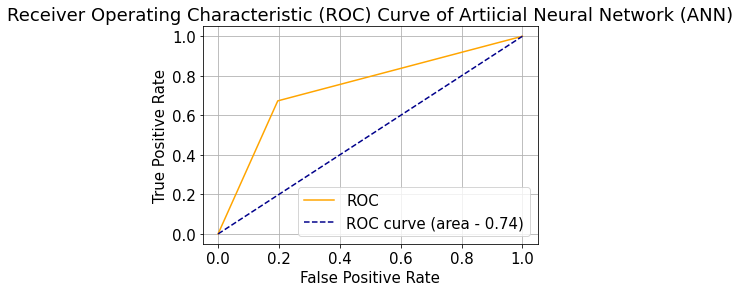

In [6437]:
fpr, tpr, thresholds = roc_curve(y_test, mlp_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Artiicial Neural Network (ANN)')
plt.legend()
plt.grid()
plt.show()

In [6438]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Naive Bayes
cm_nb = confusion_matrix(y_test,nb_pred)
cm_nb

array([[81, 21],
       [18, 34]], dtype=int64)

<AxesSubplot:>

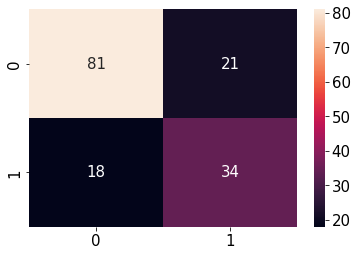

In [6439]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt="d")

In [6440]:
TN = cm_nb[0,0]
FP = cm_nb[0,1]
FN = cm_nb[1,0]
TP = cm_nb[1,1]

In [6441]:
TN, FP, FN, TP

(81, 21, 18, 34)

In [6442]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_nb = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}'.format(cm_nb[0,0])) 
print('FP - False Positive {}'.format(cm_nb[0,1]))
print('FN - False Negative {}'.format(cm_nb[1,0]))
print('TP - True Positive {}'.format(cm_nb[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_nb[0,0],cm_nb[1,1]]),np.sum(cm_nb))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_nb[0,1],cm_nb[1,0]]),np.sum(cm_nb))*100))

TN - True Negative 81
FP - False Positive 21
FN - False Negative 18
TP - True Positive 34
Accuracy Rate: 74.67532467532467
Misclassification Rate: 25.324675324675322


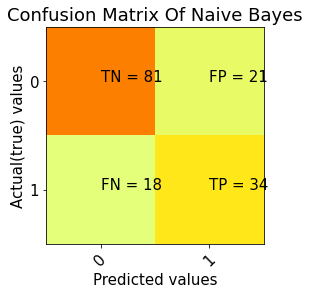

In [6443]:
plt.clf()
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Naive Bayes')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_nb[i][j]))

In [6444]:
pd.crosstab(y_test, nb_pred, margins=False)

col_0,0,1
Outcome,,
0,81,21
1,18,34


In [6445]:
pd.crosstab(y_test, nb_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,81,21,102
1,18,34,52
All,99,55,154


In [6446]:
pd.crosstab(y_test, nb_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,81,21,102
1,18,34,52
All,99,55,154


In [6447]:
TP,FP

(34, 21)

In [6448]:
Precision = TP/(TP+FP)
Precision

0.6181818181818182

In [6449]:
# print precision score

precision_Score_nb = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_nb))

Precision score: 61.8182


In [6450]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, nb_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, nb_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (y_test, nb_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, nb_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(y_test, nb_pred, average=None)*100)

precision Score is: 61.81818181818181
Mircro Average precision Score is: 74.67532467532467
Marcro Average precision Score is: 71.81818181818183
Weighted Average precision Score is: 75.06493506493506
precision Score on Non weighted score is: [81.81818182 61.81818182]


In [6451]:
print('Classification Report of Naive Bayes: \n',classification_report(y_test, nb_pred, digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.8182    0.7941    0.8060       102
           1     0.6182    0.6538    0.6355        52

    accuracy                         0.7468       154
   macro avg     0.7182    0.7240    0.7207       154
weighted avg     0.7506    0.7468    0.7484       154



In [6452]:
recall_score_nb = TP / float(TP + FN)*100
print('recall score', recall_score_nb)

recall score 65.38461538461539


In [6453]:
TP,FN

(34, 18)

In [6454]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(y_test,nb_pred)*100)

Recall or Sensitivity score : 65.38461538461539


In [6455]:
print("Mircro Average Recall Score is", recall_score(y_test, nb_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(y_test, nb_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test, nb_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(y_test, nb_pred, average=None)*100)

Mircro Average Recall Score is 74.67532467532467
Marcro Average Recall Score is 72.39819004524887
Weighted Average Recall Score is: 74.67532467532467
Recall Score on Non weighted score is: [79.41176471 65.38461538]


In [6456]:
print('Classification Report of Naive Bayes: \n',classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.8182    0.7941    0.8060       102
           1     0.6182    0.6538    0.6355        52

    accuracy                         0.7468       154
   macro avg     0.7182    0.7240    0.7207       154
weighted avg     0.7506    0.7468    0.7484       154



In [6457]:
FPR_nb = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_nb))

False Positive Rate: 20.5882


In [6458]:
FP, TN

(21, 81)

In [6459]:
specificity_nb = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_nb))

Specificity: 79.4118


In [6460]:
from sklearn.metrics import f1_score
f1_score_nb = f1_score(y_test, nb_pred)*100
print("f1_score of macro :",f1_score_nb)

f1_score of macro : 63.55140186915889


In [6461]:
print("Mircro Average F1 Score is:", f1_score(y_test, nb_pred, average='micro')*100)
print("Marcro Average F1 Score is:", f1_score(y_test, nb_pred, average='macro')*100)
print("Weighted Average F1 Score is:", f1_score(y_test, nb_pred, average='weighted')*100)
print("F1 Score on Non weighted score is:", f1_score(y_test, nb_pred, average=None)*100)

Mircro Average F1 Score is: 74.67532467532466
Marcro Average F1 Score is: 72.07420839726602
Weighted Average F1 Score is: 74.84135337392418
F1 Score on Non weighted score is: [80.59701493 63.55140187]


In [6462]:
from sklearn.metrics import classification_report
print('Classification Report of Naive Bayes: \n', classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.8182    0.7941    0.8060       102
           1     0.6182    0.6538    0.6355        52

    accuracy                         0.7468       154
   macro avg     0.7182    0.7240    0.7207       154
weighted avg     0.7506    0.7468    0.7484       154



In [6463]:
# Area Under Curve 
auc_nb = roc_auc_score(y_test, nb_pred)
print("ROC AUC SCORE of Naive Bayes is", auc_nb)

ROC AUC SCORE of Naive Bayes is 0.7239819004524887


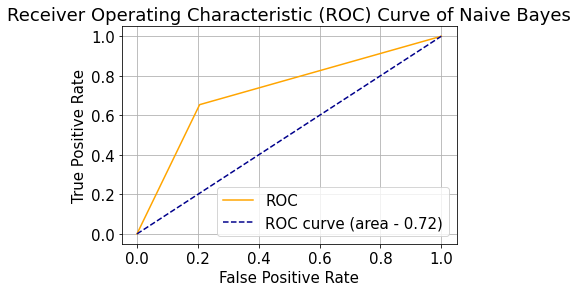

In [6464]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()
plt.grid()
plt.show()

In [6465]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Support Vector Machine
cm_sv = confusion_matrix(y_test,sv_pred)
cm_sv

array([[86, 16],
       [20, 32]], dtype=int64)

<AxesSubplot:>

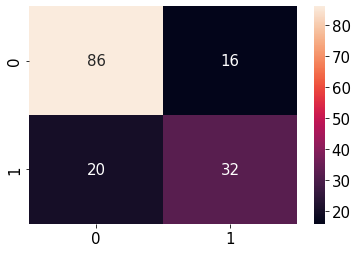

In [6466]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt="d")

In [6467]:
TN = cm_sv[0,0]
FP = cm_sv[0,1]
FN = cm_sv[1,0]
TP = cm_sv[1,1]

In [6468]:
TN, FP, FN, TP

(86, 16, 20, 32)

In [6469]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_sv = confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}'.format(cm_sv[0,0])) 
print('FP - False Positive {}'.format(cm_sv[0,1]))
print('FN - False Negative {}'.format(cm_sv[1,0]))
print('TP - True Positive {}'.format(cm_sv[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_sv[0,0],cm_sv[1,1]]),np.sum(cm_sv))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_sv[0,1],cm_sv[1,0]]),np.sum(cm_sv))*100))

TN - True Negative 86
FP - False Positive 16
FN - False Negative 20
TP - True Positive 32
Accuracy Rate: 76.62337662337663
Misclassification Rate: 23.376623376623375


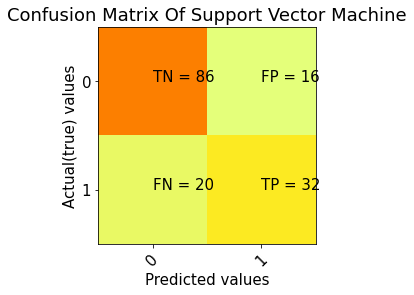

In [6470]:
plt.clf()
plt.imshow(cm_sv, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Support Vector Machine')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_sv[i][j]))

In [6471]:
pd.crosstab(y_test, sv_pred, margins=False)

col_0,0,1
Outcome,,
0,86,16
1,20,32


In [6472]:
pd.crosstab(y_test, sv_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,86,16,102
1,20,32,52
All,106,48,154


In [6473]:
pd.crosstab(y_test, sv_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,86,16,102
1,20,32,52
All,106,48,154


In [6474]:
TP,FP

(32, 16)

In [6475]:
Precision = TP/(TP+FP)
Precision

0.6666666666666666

In [6476]:
# print precision score

precision_Score_sv = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_sv))

Precision score: 66.6667


In [6477]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, sv_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, sv_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (y_test, sv_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, sv_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(y_test, sv_pred, average=None)*100)

precision Score is: 66.66666666666666
Mircro Average precision Score is: 76.62337662337663
Marcro Average precision Score is: 73.89937106918238
Weighted Average precision Score is: 76.24765171934983
precision Score on Non weighted score is: [81.13207547 66.66666667]


In [6478]:
print('Classification Report of Support Vector Machine: \n',classification_report(y_test, sv_pred, digits=4))

Classification Report of Support Vector Machine: 
               precision    recall  f1-score   support

           0     0.8113    0.8431    0.8269       102
           1     0.6667    0.6154    0.6400        52

    accuracy                         0.7662       154
   macro avg     0.7390    0.7293    0.7335       154
weighted avg     0.7625    0.7662    0.7638       154



In [6479]:
recall_score_sv = TP / float(TP + FN)*100
print('recall score', recall_score_sv)

recall score 61.53846153846154


In [6480]:
TP,FN

(32, 20)

In [6481]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(y_test,sv_pred)*100)

Recall or Sensitivity score : 61.53846153846154


In [6482]:
print("Mircro Average Recall Score is", recall_score(y_test, sv_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(y_test, sv_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test, sv_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(y_test, sv_pred, average=None)*100)

Mircro Average Recall Score is 76.62337662337663
Marcro Average Recall Score is 72.92609351432881
Weighted Average Recall Score is: 76.62337662337663
Recall Score on Non weighted score is: [84.31372549 61.53846154]


In [6483]:
print('Classification Report of Support Vector Machine: \n',classification_report(y_test,sv_pred,digits=4))

Classification Report of Support Vector Machine: 
               precision    recall  f1-score   support

           0     0.8113    0.8431    0.8269       102
           1     0.6667    0.6154    0.6400        52

    accuracy                         0.7662       154
   macro avg     0.7390    0.7293    0.7335       154
weighted avg     0.7625    0.7662    0.7638       154



In [6484]:
FPR_sv = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_sv))

False Positive Rate: 15.6863


In [6485]:
FP, TN

(16, 86)

In [6486]:
specificity_sv = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_sv))

Specificity: 84.3137


In [6487]:
from sklearn.metrics import f1_score
f1_score_sv = f1_score(y_test, sv_pred)*100
print("f1_score of macro :",f1_score_sv)

f1_score of macro : 64.0


In [6488]:
print("Mircro Average F1 Score is:", f1_score(y_test, sv_pred, average='micro')*100)
print("Marcro Average F1 Score is:", f1_score(y_test, sv_pred, average='macro')*100)
print("Weighted Average F1 Score is:", f1_score(y_test, sv_pred, average='weighted')*100)
print("F1 Score on Non weighted score is:", f1_score(y_test, sv_pred, average=None)*100)

Mircro Average F1 Score is: 76.62337662337663
Marcro Average F1 Score is: 73.34615384615385
Weighted Average F1 Score is: 76.38061938061938
F1 Score on Non weighted score is: [82.69230769 64.        ]


In [6489]:
from sklearn.metrics import classification_report
print('Classification Report of Support Vector Machine: \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of Support Vector Machine: 
               precision    recall  f1-score   support

           0     0.8113    0.8431    0.8269       102
           1     0.6667    0.6154    0.6400        52

    accuracy                         0.7662       154
   macro avg     0.7390    0.7293    0.7335       154
weighted avg     0.7625    0.7662    0.7638       154



In [6490]:
# Area Under Curve 
auc_sv = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of Support Vector Machine is", auc_sv)

ROC AUC SCORE of Support Vector Machine is 0.7292609351432882


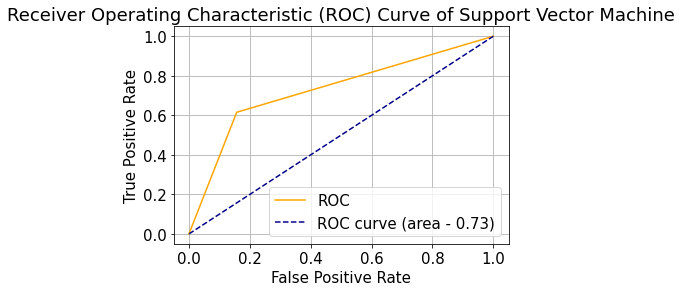

In [6491]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_sv)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machine')
plt.legend()
plt.grid()
plt.show()

In [6492]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Decision Tree
cm_dt = confusion_matrix(y_test,dt_pred)
cm_dt

array([[75, 27],
       [20, 32]], dtype=int64)

<AxesSubplot:>

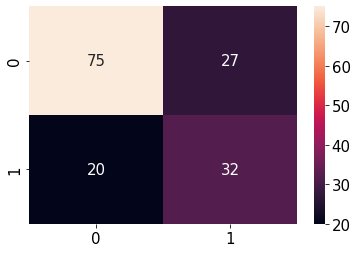

In [6493]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")

In [6494]:
TN = cm_dt[0,0]
FP = cm_dt[0,1]
FN = cm_dt[1,0]
TP = cm_dt[1,1]

In [6495]:
TN, FP, FN, TP

(75, 27, 20, 32)

In [6496]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_dt = confusion_matrix(y_test, dt_pred)

print('TN - True Negative {}'.format(cm_dt[0,0])) 
print('FP - False Positive {}'.format(cm_dt[0,1]))
print('FN - False Negative {}'.format(cm_dt[1,0]))
print('TP - True Positive {}'.format(cm_dt[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_dt[0,0],cm_dt[1,1]]),np.sum(cm_dt))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_dt[0,1],cm_dt[1,0]]),np.sum(cm_dt))*100))

TN - True Negative 75
FP - False Positive 27
FN - False Negative 20
TP - True Positive 32
Accuracy Rate: 69.48051948051948
Misclassification Rate: 30.519480519480517


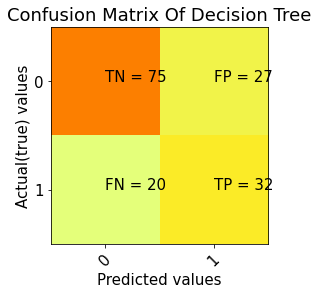

In [6497]:
plt.clf()
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Decision Tree')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_dt[i][j]))

In [6498]:
pd.crosstab(y_test, dt_pred, margins=False)

col_0,0,1
Outcome,,
0,75,27
1,20,32


In [6499]:
pd.crosstab(y_test, dt_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,75,27,102
1,20,32,52
All,95,59,154


In [6500]:
pd.crosstab(y_test, dt_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,75,27,102
1,20,32,52
All,95,59,154


In [6501]:
TP,FP

(32, 27)

In [6502]:
Precision = TP/(TP+FP)
Precision

0.5423728813559322

In [6503]:
# print precision score

precision_Score_dt = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_dt))

Precision score: 54.2373


In [6504]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, dt_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, dt_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (y_test, dt_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, dt_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(y_test, dt_pred, average=None)*100)

precision Score is: 54.23728813559322
Mircro Average precision Score is: 69.48051948051948
Marcro Average precision Score is: 66.59232827832294
Weighted Average precision Score is: 70.60370494804036
precision Score on Non weighted score is: [78.94736842 54.23728814]


In [6505]:
print('Classification Report of Decison Tree: \n',classification_report(y_test, dt_pred, digits=4))

Classification Report of Decison Tree: 
               precision    recall  f1-score   support

           0     0.7895    0.7353    0.7614       102
           1     0.5424    0.6154    0.5766        52

    accuracy                         0.6948       154
   macro avg     0.6659    0.6753    0.6690       154
weighted avg     0.7060    0.6948    0.6990       154



In [6506]:
recall_score_dt = TP / float(TP + FN)*100
print('recall score', recall_score_dt)

recall score 61.53846153846154


In [6507]:
TP,FN

(32, 20)

In [6508]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(y_test,dt_pred)*100)

Recall or Sensitivity score : 61.53846153846154


In [6509]:
print("Mircro Average Recall Score is", recall_score(y_test, dt_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(y_test, dt_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test, dt_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(y_test, dt_pred, average=None)*100)

Mircro Average Recall Score is 69.48051948051948
Marcro Average Recall Score is 67.53393665158372
Weighted Average Recall Score is: 69.48051948051948
Recall Score on Non weighted score is: [73.52941176 61.53846154]


In [6510]:
print('Classification Report of Decision Tree: \n',classification_report(y_test,dt_pred,digits=4))

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.7895    0.7353    0.7614       102
           1     0.5424    0.6154    0.5766        52

    accuracy                         0.6948       154
   macro avg     0.6659    0.6753    0.6690       154
weighted avg     0.7060    0.6948    0.6990       154



In [6511]:
FPR_dt = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_dt))

False Positive Rate: 26.4706


In [6512]:
FP, TN

(27, 75)

In [6513]:
specificity_dt = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_dt))

Specificity: 73.5294


In [6514]:
from sklearn.metrics import f1_score
f1_score_dt = f1_score(y_test, dt_pred)*100
print("f1_score of macro :",f1_score_dt)

f1_score of macro : 57.65765765765766


In [6515]:
# Area Under Curve 
auc_dt = roc_auc_score(y_test, dt_pred)
print("ROC AUC SCORE of Decision Tree is", auc_dt)

ROC AUC SCORE of Decision Tree is 0.6753393665158371


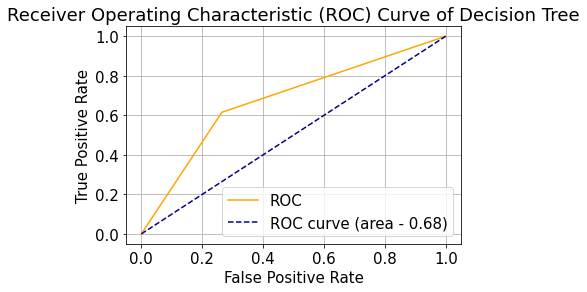

In [6516]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
plt.legend()
plt.grid()
plt.show()

In [6517]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Random Forest
cm_rf = confusion_matrix(y_test,rf_pred)
cm_rf

array([[84, 18],
       [20, 32]], dtype=int64)

<AxesSubplot:>

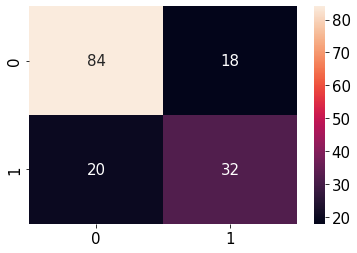

In [6518]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")

In [6519]:
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]
TP = cm_rf[1,1]

In [6520]:
TN, FP, FN, TP

(84, 18, 20, 32)

In [6521]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
cm_rf = confusion_matrix(y_test, rf_pred)

print('TN - True Negative {}'.format(cm_rf[0,0])) 
print('FP - False Positive {}'.format(cm_rf[0,1]))
print('FN - False Negative {}'.format(cm_rf[1,0]))
print('TP - True Positive {}'.format(cm_rf[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_rf[0,0],cm_rf[1,1]]),np.sum(cm_rf))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_rf[0,1],cm_rf[1,0]]),np.sum(cm_rf))*100))

TN - True Negative 84
FP - False Positive 18
FN - False Negative 20
TP - True Positive 32
Accuracy Rate: 75.32467532467533
Misclassification Rate: 24.675324675324674


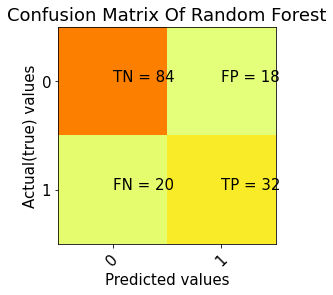

In [6522]:
plt.clf()
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Random Forest')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_rf[i][j]))

In [6523]:
pd.crosstab(y_test, rf_pred, margins=False)

col_0,0,1
Outcome,,
0,84,18
1,20,32


In [6524]:
pd.crosstab(y_test, rf_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,84,18,102
1,20,32,52
All,104,50,154


In [6525]:
pd.crosstab(y_test, rf_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,84,18,102
1,20,32,52
All,104,50,154


In [6526]:
TP,FP

(32, 18)

In [6527]:
Precision = TP/(TP+FP)
Precision

0.64

In [6528]:
# print precision score

precision_Score_rf = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_rf))

Precision score: 64.0000


In [6529]:
from sklearn.metrics import precision_score

print("precision Score is:", precision_score (y_test, rf_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, rf_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (y_test, rf_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, rf_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(y_test, rf_pred, average=None)*100)

precision Score is: 64.0
Mircro Average precision Score is: 75.32467532467533
Marcro Average precision Score is: 72.38461538461539
Weighted Average precision Score is: 75.10689310689311
precision Score on Non weighted score is: [80.76923077 64.        ]


In [6530]:
print('Classification Report of Random Forest: \n',classification_report(y_test, rf_pred, digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8077    0.8235    0.8155       102
           1     0.6400    0.6154    0.6275        52

    accuracy                         0.7532       154
   macro avg     0.7238    0.7195    0.7215       154
weighted avg     0.7511    0.7532    0.7520       154



In [6531]:
recall_score_rf = TP / float(TP + FN)*100
print('recall score', recall_score_rf)

recall score 61.53846153846154


In [6532]:
TP,FN

(32, 20)

In [6533]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score(y_test,rf_pred)*100)

Recall or Sensitivity score : 61.53846153846154


In [6534]:
print("Mircro Average Recall Score is", recall_score(y_test, rf_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(y_test, rf_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(y_test, rf_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(y_test, rf_pred, average=None)*100)

Mircro Average Recall Score is 75.32467532467533
Marcro Average Recall Score is 71.94570135746606
Weighted Average Recall Score is: 75.32467532467533
Recall Score on Non weighted score is: [82.35294118 61.53846154]


In [6535]:
print('Classification Report of Random Forest: \n',classification_report(y_test,rf_pred,digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8077    0.8235    0.8155       102
           1     0.6400    0.6154    0.6275        52

    accuracy                         0.7532       154
   macro avg     0.7238    0.7195    0.7215       154
weighted avg     0.7511    0.7532    0.7520       154



In [6536]:
FPR_rf = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_rf))

False Positive Rate: 17.6471


In [6537]:
FP, TN

(18, 84)

In [6538]:
specificity_rf = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_rf))

Specificity: 82.3529


In [6539]:
from sklearn.metrics import f1_score
f1_score_rf = f1_score(y_test, rf_pred)*100
print("f1_score of macro :",f1_score_rf)

f1_score of macro : 62.745098039215684


In [6540]:
# Area Under Curve 
auc_rf = roc_auc_score(y_test, rf_pred)
print("ROC AUC SCORE of Radom Forest is", auc_rf)

ROC AUC SCORE of Radom Forest is 0.7194570135746606


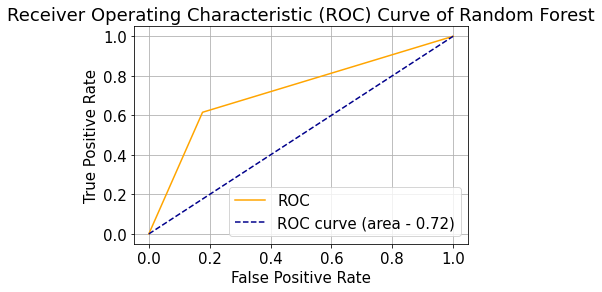

In [6541]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()
plt.grid()
plt.show()

In [6542]:
train = []

train_ANN = mlp.score(X_train, y_train)*100
train_NB = nb.score(X_train, y_train)*100
train_SV = sv.score(X_train, y_train)*100
train_DT = dt.score(X_train, y_train)*100
train_RF = rf.score(X_train, y_train)*100

train.append(train_ANN)
train.append(train_NB)
train.append(train_SV)
train.append(train_DT)
train.append(train_RF)

print("Train Accuracy ANN :", train[0])
print("Train Accuracy Naive Bayes :", train[1])
print("Train Accuracy SVM :", train[2])
print("Train Accuracy Decision Tree :", train[3])
print("Train Accuracy Random Forest :", train[4])

Train Accuracy ANN : 81.75895765472313
Train Accuracy Naive Bayes : 74.5928338762215
Train Accuracy SVM : 82.89902280130293
Train Accuracy Decision Tree : 100.0
Train Accuracy Random Forest : 100.0


In [6543]:
test = []

test_ANN = accuracy_score(y_test, mlp_pred)*100
test_NB = accuracy_score(y_test, nb_pred)*100
test_SV = accuracy_score(y_test, sv_pred)*100
test_DT = accuracy_score(y_test, dt_pred)*100
test_RF = accuracy_score(y_test, rf_pred)*100

test.append(test_ANN)
test.append(test_NB)
test.append(test_SV)
test.append(test_DT)
test.append(test_RF)

print("HASIL MODEL EVALUASI ANN ACCURACY TEST SCORE DAN ACCURACY SCORE :", test[0])
print("HASIL MODEL EVALUASI Naive Bayes ACCURACY TEST SCORE DAN ACCURACY SCORE :", test[1])
print("HASIL MODEL EVALUASI SVM ACCURACY TEST SCORE DAN ACCURACY SCORE :", test[2])
print("HASIL MODEL EVALUASI Decision Tree ACCURACY TEST SCORE DAN ACCURACY SCORE :", test[3])
print("HASIL MODEL EVALUASI Random Forest ACCURACY TEST SCORE DAN ACCURACY SCORE :", test[4])

HASIL MODEL EVALUASI ANN ACCURACY TEST SCORE DAN ACCURACY SCORE : 75.97402597402598
HASIL MODEL EVALUASI Naive Bayes ACCURACY TEST SCORE DAN ACCURACY SCORE : 74.67532467532467
HASIL MODEL EVALUASI SVM ACCURACY TEST SCORE DAN ACCURACY SCORE : 76.62337662337663
HASIL MODEL EVALUASI Decision Tree ACCURACY TEST SCORE DAN ACCURACY SCORE : 69.48051948051948
HASIL MODEL EVALUASI Random Forest ACCURACY TEST SCORE DAN ACCURACY SCORE : 75.32467532467533


In [6544]:
list_miss = []

miss_ann = np.divide(np.sum([cm_mlp[0,1],cm_mlp[1,0]]),np.sum(cm_mlp))*100
miss_nb = np.divide(np.sum([cm_nb[0,1],cm_nb[1,0]]),np.sum(cm_nb))*100
miss_sv = np.divide(np.sum([cm_sv[0,1],cm_sv[1,0]]),np.sum(cm_sv))*100
miss_dt = np.divide(np.sum([cm_dt[0,1],cm_dt[1,0]]),np.sum(cm_dt))*100
miss_rf = np.divide(np.sum([cm_rf[0,1],cm_rf[1,0]]),np.sum(cm_rf))*100

list_miss.append(miss_ann)
list_miss.append(miss_nb)
list_miss.append(miss_sv)
list_miss.append(miss_dt)
list_miss.append(miss_rf)

print("Miss Accuracy Rate ANN :", list_miss[0])
print("Miss Accuracy Rate Naive Bayes :", list_miss[1])
print("Miss Accuracy Rate SVM :", list_miss[2])
print("Miss Accuracy Rate Decision Tree :", list_miss[3])
print("Miss Accuracy Rate Random Forest :", list_miss[4])

Miss Accuracy Rate ANN : 24.025974025974026
Miss Accuracy Rate Naive Bayes : 25.324675324675322
Miss Accuracy Rate SVM : 23.376623376623375
Miss Accuracy Rate Decision Tree : 30.519480519480517
Miss Accuracy Rate Random Forest : 24.675324675324674


In [6545]:
list_ps = []

list_ps.append(precision_Score_mlp)
list_ps.append(precision_Score_nb)
list_ps.append(precision_Score_sv)
list_ps.append(precision_Score_dt)
list_ps.append(precision_Score_rf)

print("Precison Score ANN :", precision_Score_mlp)
print("Precison Score Naive Bayes :", precision_Score_nb)
print("Precison Score SVM :", precision_Score_sv)
print("Precison Score Decision Tree :", precision_Score_dt)
print("Precison Score Random Forest :", precision_Score_rf)

Precison Score ANN : 63.63636363636363
Precison Score Naive Bayes : 61.81818181818181
Precison Score SVM : 66.66666666666666
Precison Score Decision Tree : 54.23728813559322
Precison Score Random Forest : 64.0


In [6546]:
list_rs = []

list_rs.append(recall_score_mlp)
list_rs.append(recall_score_nb)
list_rs.append(recall_score_sv)
list_rs.append(recall_score_dt)
list_rs.append(recall_score_rf)

print("Recall Score ANN :", recall_score_mlp)
print("Recall Score Naive Bayes :", recall_score_nb)
print("Recall Score SVM :", recall_score_sv)
print("Recall Score Decision Tree :", recall_score_dt)
print("Recall Score Random Forest :", recall_score_rf)

Recall Score ANN : 67.3076923076923
Recall Score Naive Bayes : 65.38461538461539
Recall Score SVM : 61.53846153846154
Recall Score Decision Tree : 61.53846153846154
Recall Score Random Forest : 61.53846153846154


In [6547]:
list_fpr = []

list_fpr.append(FPR_mlp)
list_fpr.append(FPR_nb)
list_fpr.append(FPR_sv)
list_fpr.append(FPR_dt)
list_fpr.append(FPR_rf)

print("False Positive Rate ANN :", FPR_mlp)
print("False Positive Rate Naive Bayes :", FPR_nb)
print("False Positive Rate SVM :", FPR_sv)
print("False Positive Rate Decision Tree :", FPR_dt)
print("False Positive Rate Random Forest :", FPR_rf)

False Positive Rate ANN : 19.607843137254903
False Positive Rate Naive Bayes : 20.588235294117645
False Positive Rate SVM : 15.686274509803921
False Positive Rate Decision Tree : 26.47058823529412
False Positive Rate Random Forest : 17.647058823529413


In [6548]:
list_s = []

list_s.append(specificity_mlp)
list_s.append(specificity_nb)
list_s.append(specificity_sv)
list_s.append(specificity_dt)
list_s.append(specificity_rf)

print("Speficity ANN :", specificity_mlp)
print("Speficity Naive Bayes :", specificity_nb)
print("Speficity SVM :", specificity_sv)
print("Speficity Decision Tree :", specificity_dt)
print("Speficity Random Forest :", specificity_rf)

Speficity ANN : 80.3921568627451
Speficity Naive Bayes : 79.41176470588235
Speficity SVM : 84.31372549019608
Speficity Decision Tree : 73.52941176470588
Speficity Random Forest : 82.35294117647058


In [6549]:
list_f1 = []

list_f1.append(f1_score_mlp)
list_f1.append(f1_score_nb)
list_f1.append(f1_score_sv)
list_f1.append(f1_score_dt)
list_f1.append(f1_score_rf)

print("F1 Score ANN :", f1_score_mlp)
print("F1 Score Naive Bayes :", f1_score_nb)
print("F1 Score SVM :", f1_score_sv)
print("F1 Score Decision Tree :", f1_score_dt)
print("F1 Score Random Forest :", f1_score_rf)

F1 Score ANN : 65.42056074766354
F1 Score Naive Bayes : 63.55140186915889
F1 Score SVM : 64.0
F1 Score Decision Tree : 57.65765765765766
F1 Score Random Forest : 62.745098039215684


In [6550]:
list_auc = []

list_auc.append(auc_mlp)
list_auc.append(auc_nb)
list_auc.append(auc_sv)
list_auc.append(auc_dt)
list_auc.append(auc_rf)

print("ROC AUC SCORE ANN :", auc_mlp)
print("ROC AUC SCORE Naive Bayes :", auc_nb)
print("ROC AUC SCORE SVM :", auc_sv)
print("ROC AUC SCORE Decision Tree :", auc_dt)
print("ROC AUC SCORE Ranndom Forest :", auc_rf)

ROC AUC SCORE ANN : 0.7384992458521871
ROC AUC SCORE Naive Bayes : 0.7239819004524887
ROC AUC SCORE SVM : 0.7292609351432882
ROC AUC SCORE Decision Tree : 0.6753393665158371
ROC AUC SCORE Ranndom Forest : 0.7194570135746606


In [6551]:
data = {'Algoritma':['Artificial Neural Network','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest'],
     'Train Accuracy':train,
       'Accuracy':test}
df_evaluasi = pd.DataFrame(data, index=[1,2,3,4,5])
df_evaluasi.to_csv("Hasil Prediksi Algoritma Machine Learning.csv")
df_evaluasi

,Algoritma,Train Accuracy,Accuracy
1,Artificial Neural Network,81.758958,75.974026
2,Naive Bayes,74.592834,74.675325
3,Support Vector Machine,82.899023,76.623377
4,Decision Tree,100.000000,69.480519
5,Random Forest,100.000000,75.324675


In [6552]:
data = {'Algoritma':['Artificial Neural Network','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest'],
       'Miss Accuracy':list_miss,
       'Precison':list_ps,
       'Recall':list_rs,
       'False Positive Rate':list_fpr,
       'Specificity':list_s,
       'F1 Score':list_f1,
       'ROC AUC Score':list_auc}
df_confusion = pd.DataFrame(data, index=[1,2,3,4,5])
df_confusion.to_csv("Hasil Prediksi Algoritma Machine Learning.csv")
df_confusion

,Algoritma,Miss Accuracy,Precison,Recall,False Positive Rate,Specificity,F1 Score,ROC AUC Score
1,Artificial Neural Network,24.025974,63.636364,67.307692,19.607843,80.392157,65.420561,0.738499
2,Naive Bayes,25.324675,61.818182,65.384615,20.588235,79.411765,63.551402,0.723982
3,Support Vector Machine,23.376623,66.666667,61.538462,15.686275,84.313725,64.000000,0.729261
4,Decision Tree,30.519481,54.237288,61.538462,26.470588,73.529412,57.657658,0.675339
5,Random Forest,24.675325,64.000000,61.538462,17.647059,82.352941,62.745098,0.719457


In [6553]:
data = {'Algoritma':['Artificial Neural Network','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest'],
     'Train Accuracy':train,
       'Accuracy':test,
       'Miss Accuracy':list_miss,
       'Precison':list_ps,
       'Recall':list_rs,
       'False Positive Rate':list_fpr,
       'Specificity':list_s,
       'F1 Score':list_f1,
       'ROC AUC Score':list_auc}
df = pd.DataFrame(data, index=[1,2,3,4,5])
df.to_csv("Hasil Prediksi Algoritma Machine Learning.csv")
df

,Algoritma,Train Accuracy,Accuracy,Miss Accuracy,Precison,Recall,False Positive Rate,Specificity,F1 Score,ROC AUC Score
1,Artificial Neural Network,81.758958,75.974026,24.025974,63.636364,67.307692,19.607843,80.392157,65.420561,0.738499
2,Naive Bayes,74.592834,74.675325,25.324675,61.818182,65.384615,20.588235,79.411765,63.551402,0.723982
3,Support Vector Machine,82.899023,76.623377,23.376623,66.666667,61.538462,15.686275,84.313725,64.000000,0.729261
4,Decision Tree,100.000000,69.480519,30.519481,54.237288,61.538462,26.470588,73.529412,57.657658,0.675339
5,Random Forest,100.000000,75.324675,24.675325,64.000000,61.538462,17.647059,82.352941,62.745098,0.719457


## Algoritma vs Train Accuracy

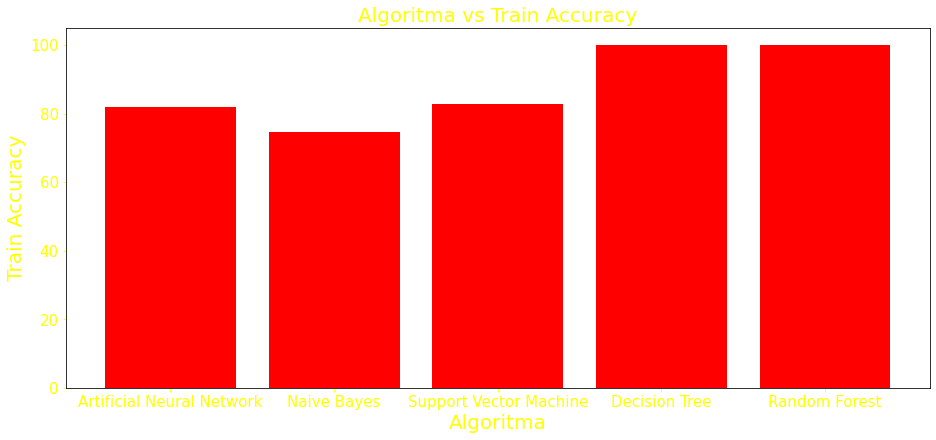

In [6554]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Train Accuracy', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Train Accuracy', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, train, color='Red')
plt.show()

## Algortitma vs Accuracy

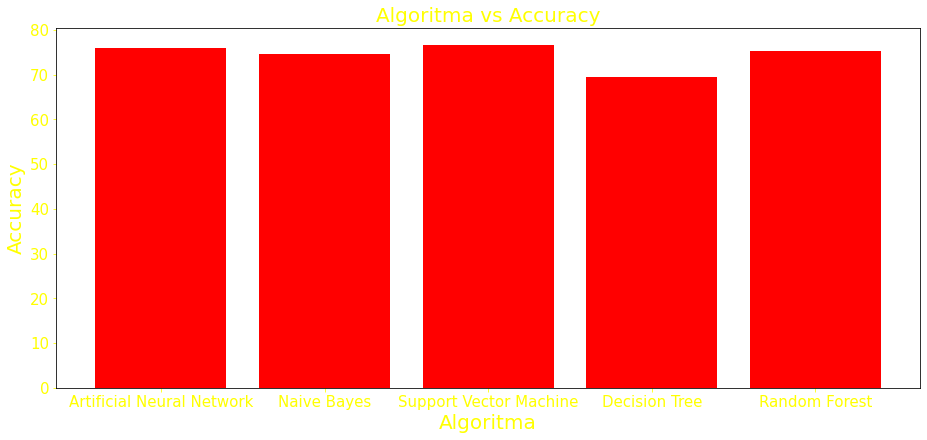

In [6555]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Accuracy', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Accuracy', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, test, color='Red')
plt.show()

## Algoritma vs Miss Accuracy

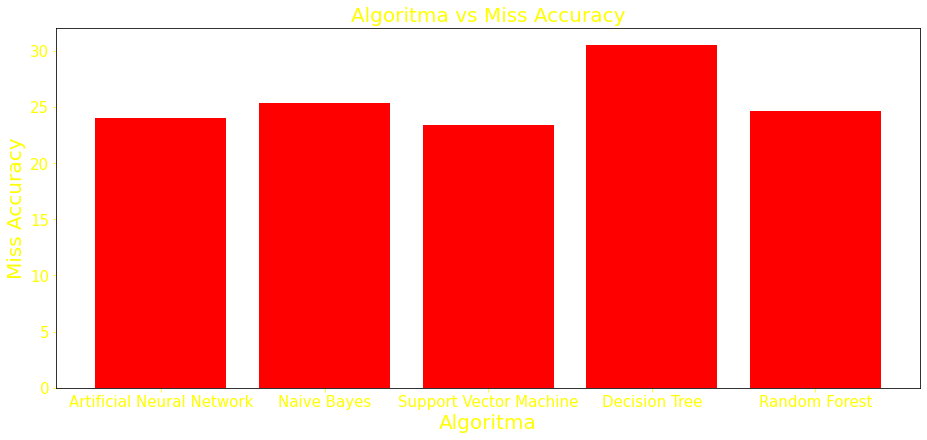

In [6556]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Miss Accuracy', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Miss Accuracy', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_miss, color='Red')
plt.show()

## Algoritma vs Precision Score

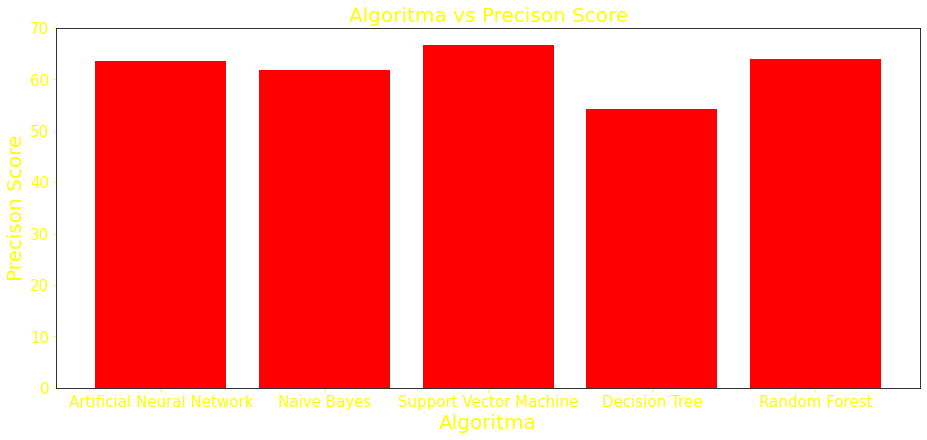

In [6557]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Precison Score', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Precison Score', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_ps, color='Red')
plt.show()

## Algoritma vs Recall Score

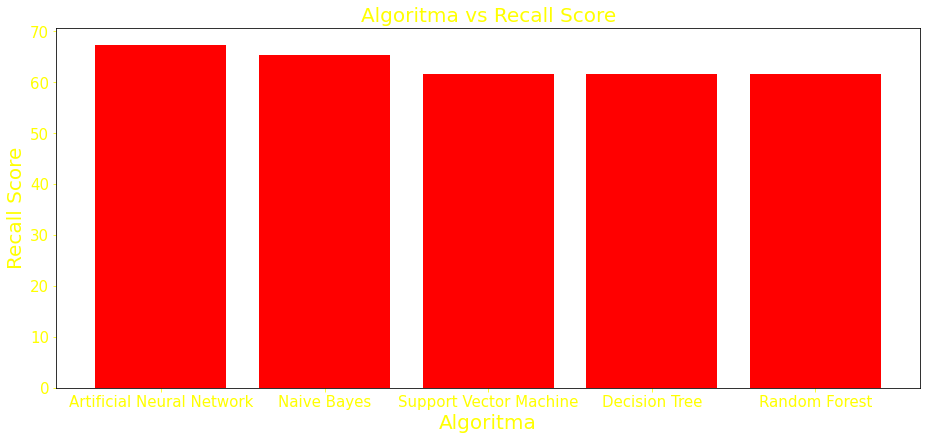

In [6558]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Recall Score', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Recall Score', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_rs, color='Red')
plt.show()

## Algoritma vs False Positive Rate

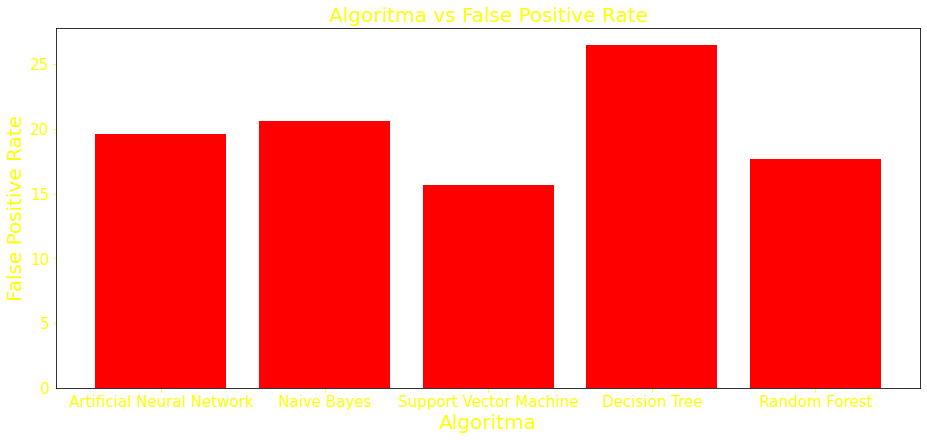

In [6559]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs False Positive Rate', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('False Positive Rate', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_fpr, color='Red')
plt.show()

## Algoritma vs Speficity

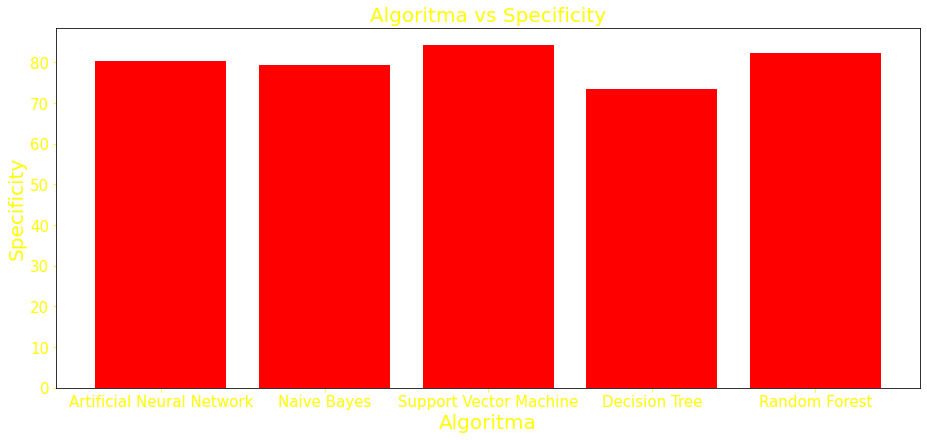

In [6560]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Specificity', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Specificity', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_s, color='Red')
plt.show()

## Algoritma vs F1 Score

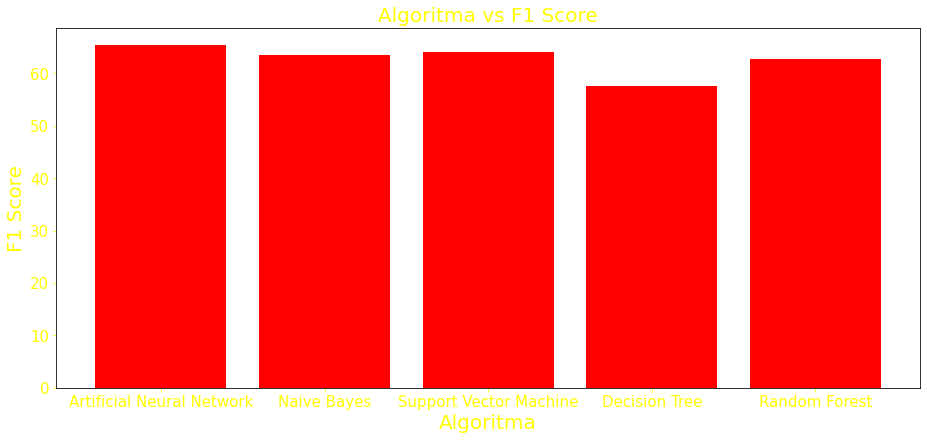

In [6561]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs F1 Score', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('F1 Score', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_f1, color='Red')
plt.show()

## Algoritma vs ROC AUC Score

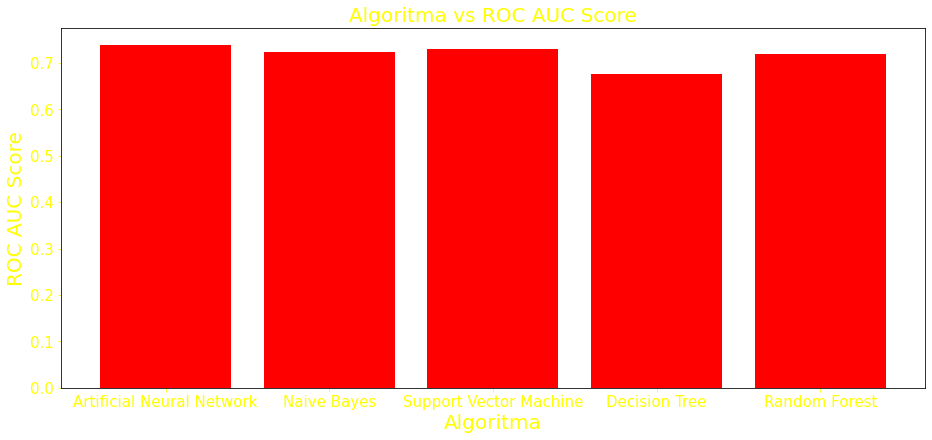

In [6562]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs ROC AUC Score', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('ROC AUC Score', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_auc, color='Red')
plt.show()

## TUNING PARAMETER MODEL

In [6563]:
model_params = {
    'ANN': {
        'model': MLPClassifier(),
        'params' : {
            'hidden_layer_sizes': [(100,), (10,50,10), (20,), (100,100)],
            'activation': ['logistic', 'tanh', 'relu'],
            'learning_rate_init': [0.001, 0.05],
            'solver': ['sgd', 'adam']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['entropy','gini'],
        }
    }, 
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [20,30,40]
        }
    } 
}

In [6564]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
tuning_parameter = pd.DataFrame(scores,columns=['model','best_score','best_params'])
tuning_parameter

,model,best_score,best_params
0,ANN,0.805806,"{'activation': 'tanh', 'hidden_layer_sizes': (..."
1,naive_bayes_gaussian,0.766882,{}
2,svm,0.798925,"{'C': 1, 'kernel': 'linear'}"
3,decision_tree,0.700860,{'criterion': 'gini'}
4,random_forest,0.773548,{'n_estimators': 40}


## Algoritma vs Accuracy Best Score

In [6565]:
scores

[{'model': 'ANN',
  'best_score': 0.8058064516129033,
  'best_params': {'activation': 'tanh',
   'hidden_layer_sizes': (20,),
   'learning_rate_init': 0.001,
   'solver': 'sgd'}},
 {'model': 'naive_bayes_gaussian',
  'best_score': 0.7668817204301075,
  'best_params': {}},
 {'model': 'svm',
  'best_score': 0.7989247311827957,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'decision_tree',
  'best_score': 0.7008602150537634,
  'best_params': {'criterion': 'gini'}},
 {'model': 'random_forest',
  'best_score': 0.7735483870967742,
  'best_params': {'n_estimators': 40}}]

In [6574]:
list_best_score = [0.8058064516129033, 0.7668817204301075, 0.7989247311827957, 
                   0.7008602150537634, 0.7735483870967742]

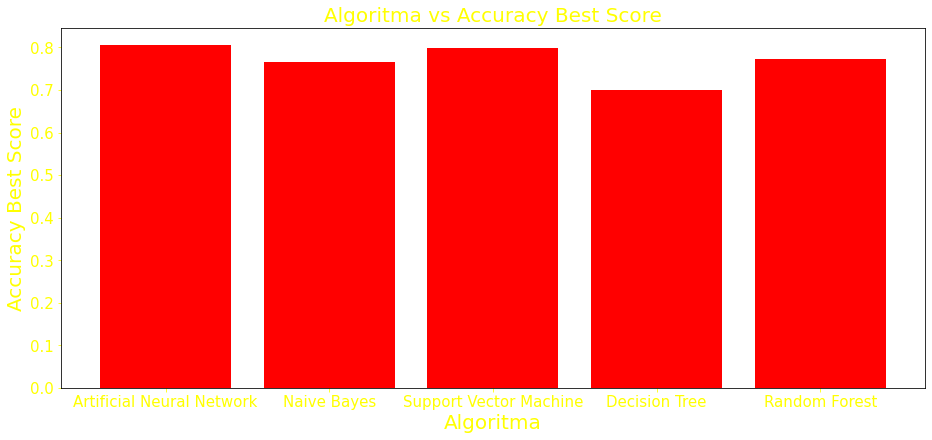

In [6575]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='Yellow', which='both')
plt.title('Algoritma vs Accuracy Best Score', fontsize = 20, color = 'Yellow')
plt.xlabel('Algoritma', fontsize = 20, color = 'Yellow')
plt.ylabel('Accuracy Best Score', fontsize = 20, color = 'Yellow')
Algoritma = ['Artificial Neural Network', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
ax.bar(Algoritma, list_best_score, color='Red')
plt.show()

## Making Prediction System

In [6576]:
input_dataS = (5,166,72,19,175,25.8,0.587,51)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)

input_data_as_numpy_array2 = np.asarray(input_data2)
print(input_data_as_numpy_array2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

std_data2 = scaler.transform(input_data_reshaped2)
print(std_data2)

[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]
[[ 0.3429808   1.45706576 -0.0210444  -0.79028616  0.60567615 -0.96796768
   0.34768723  1.51108316]]
[[-0.84488505 -1.20598931 -0.51658286  0.2486783  -1.27564498 -0.85153454
  -0.36506078 -0.19067191]]


### Artificial Neural Network

In [6578]:
prediction_mlp = mlp.predict(std_data)
print(prediction_mlp)

if (prediction_mlp[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [6579]:
prediction2_mlp = mlp.predict(std_data2)
print(prediction2_mlp)

if (prediction2_mlp[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


### Naive Bayes Gaussian

In [6580]:
prediction_nb = nb.predict(std_data)
print(prediction_nb)

if (prediction_nb[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [6581]:
prediction2_nb = nb.predict(std_data2)
print(prediction2_nb)

if (prediction2_nb[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


### Support Vector Machine

In [6582]:
prediction_sv = sv.predict(std_data)
print(prediction_sv)

if (prediction_sv[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [6583]:
prediction2_sv = sv.predict(std_data2)
print(prediction2_sv)

if (prediction2_sv[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


### Decison Tree

In [6584]:
prediction_dt = dt.predict(std_data)
print(prediction_dt)

if (prediction_dt[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [6585]:
prediction2_dt = dt.predict(std_data2)
print(prediction2_dt)

if (prediction2_dt[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


### Random Forest

In [6573]:
prediction_rf = rf.predict(std_data)
print(prediction_rf)

if (prediction_rf[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [6586]:
prediction2_rf = mlp.predict(std_data2)
print(prediction2_rf)

if (prediction2_rf[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic
